# Combining Data with Pandas
In the last mission, we worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, it's very common in practice to work with more than one data set at a time.

Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from mulitiple sources. In this mission, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these.

We'll use what we learned in the last mission to analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question:

Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

As a reminder, these reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically.
Below are descriptions for some of the columns:

- Country - Name of the country
- Region - Name of the region the country belongs to
- Happiness Rank - The rank of the country, as determined by its happiness score
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
Let's start by reading the 2015, 2016, and 2017 reports into a pandas dataframe and adding a Year column to each to make it easier to distinguish between them.

### Instructions

We've already read the World_Happiness_2015.csv file into a dataframe called happiness2015.

- Use the pandas.read_csv() function to read the World_Happiness_2016.csv file into a dataframe called happiness2016 and the World_Happiness_2017.csv file into a dataframe called happiness2017.
- Add a column called Year to each dataframe with the corresponding year. For example, the Year column in happiness2015 should contain the value 2015 for each row.

In [1]:
import pandas as pd
happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017


Let's start by exploring the *pd.concat()* function. The concat() function combines dataframes one of two ways:

- Stacked: Axis = 0 (This is the default option.)
![concat_updated](images/Concat_Updated.svg)

- Side by Side: Axis = 1
![concat_axis](images/Concat_Axis1.svg)

Since concat is a function, not a method, we use the syntax below:

![concat_syntax](images/Concat_syntax.svg)

In the next exercise, we'll use the concat() function to combine subsets of happiness2015 and happiness2016 and then debrief the results on the following screen.

Below are the subsets we'll be working with:

In [2]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


Let's use the concat() function to combine head_2015 and head_2016 next.

### Instructions

We've already saved the subsets from happiness2015 and happiness2016 to the variables head_2015 and head_2016.

- Use the pd.concat() function to combine head_2015 and head_2016 along axis = 0. Remember to pass the head_2015 and head_2016 into the function as a list. Assign the result to concat_axis0.
- Use the pd.concat() function to combine head_2015 and head_2016 along axis = 1. Remember to pass head_2015 and head_2016 into the function as a list and set the axis parameter equal to 1. Assign the result to concat_axis1.
- Use the variable inspector to view concat_axis0 and concat_axis1.
- Assign the number of rows in concat_axis0 to a variable called question1.
- Assign the number of rows in concat_axis1 to a variable called question2.

In [3]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015,head_2016], axis=0)
concat_axis1 = pd.concat([head_2015,head_2016], axis=1)
question1 = concat_axis0.shape[0]
question2 = concat_axis1.shape[0]
display(concat_axis0)
display(concat_axis1)

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


When you reviewed the results from the last exercise, you probably noticed that we merely pushed the dataframes together vertically or horizontally - none of the values, column names, or indexes changed. For this reason, when you use the concat() function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together.

![glue](Glue.svg)

However, what happens if the dataframes have different shapes or columns? Let's confirm the concat() function's behavior when we combine dataframes that don't have the same shape in the next exercise.
We will work with the following subsets:

In [4]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
display(head_2015.head(1))
head_2016.head(1)

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411


,Country,Happiness Score,Year
0,Denmark,7.526,2016


### Instructions

- Use the pd.concat() function to combine head_2015 and head_2016 along axis = 0. Remember to pass the head_2015 and head_2016 into the function as a list. Assign the result to concat_axis0.
- Use the variable inspector to view concat_axis0.
    - Assign the number of rows in concat_axis0 to a variable called rows.
    - Assign the number of columns in concat_axis0 to a variable called columns.

In [5]:
concat_axis0 = pd.concat([head_2015,head_2016], axis=0, sort=True)
rows, columns = concat_axis0.shape
display(concat_axis0, rows, columns)

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


7

4

![gluing](Concat_DifShapes.svg)

Note that because the Standard Error column didn't exist in head_2016, NaN values were created to signify those values are missing. By default, the concat function will keep ALL of the data, no matter if missing values are created.

Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

Luckily, the concat function has a parameter, ignore_index, that can be used to clear the existing index and reset it in the result. Let's practice using it next.

### Instructions

- Use the pd.concat() function to combine head_2015 and head_2016 along axis = 0 again. This time, however, set the ignore_index parameter to True to reset the index in the result. Assign the result to concat_update_index.
- Use the variable inspector to view the results and confirm the index was reset.

In [6]:
concat_update_index = pd.concat([head_2015,head_2016], axis=0, ignore_index=True, sort=True)
concat_update_index

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


Next, we'll explore the pd.merge() function - a function that can execute high performance database-style joins. Note that unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time. However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined, as we'll see in the next couple screens.

With the merge() function, we'll combine dataframes on a key, a shared index or column. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

You can think of keys as creating a link from one dataframe to another using the common values or indexes. For example, in the diagram below, we linked the dataframes using common values in the Country columns.

![merge_link](Merge_link.svg)

In the diagram below, we use those common country values to join or merge the dataframes.

![merge](Merge.svg)

We'll explore the merge function in the next exercise using just three rows from happiness2015 and happiness2016:

In [7]:
display(happiness2015[['Country','Happiness Rank','Year']].iloc[2:5])
display(happiness2016[['Country','Happiness Rank','Year']].iloc[2:5])


,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


#Instructions

- We've already saved three rows from happiness2015 and happiness2016 to variables named three_2015 and three_2016.

- Use the pd.merge() function to join three_2015 and three_2016 on the Country column. Assign the result to merged.

In [8]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015,right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


The one country returned in merged was "Norway", the only element that appeared in the Country column in BOTH three_2015 and three_2016.

This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

The term "join" originates from SQL (or structured query language), a language used to work with databases. If you're a SQL user, you'll recognize the following concepts. If you've never used SQL, don't worry! No prior knowledge is neccessary for this mission, but we will learn SQL later in this path.

There are actually four different types of joins:

- *Inner*: only includes elements that appear in both dataframes with a common key
- *Outer*: includes all data from both dataframes
- *Left*: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains   all columns from both of the original dataframes
- *Right*: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes
If the definition for outer joins sounds familiar, it's because we've already seen examples of outer joins! Recall that when we combined data using the concat function, it kept all of the data from all dataframes, no matter if missing values were created.

Since it's much more common to use inner and left joins for database-style joins, we'll focus on these join types for the remainder of the mission, but encourage you to explore the other options on your own.

Let's experiment with changing the join type next.

### Instructions

- Update merged to use a left join instead of an inner join. Set the how parameter to 'left' in merge(). Assign the result to merged_left.
- Update merged_left so that the left parameter equals three_2016 and the right parameter equals three_2015. Assign the result to merged_left_updated.
- Based on the results of this exercise, when using a left join, does changing the dataframe assigned to the left and right parameters change the result? Try to answer this question before moving onto the next screen.

In [9]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')
display(merged_left)
display(merged_left_updated)

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


Note that a right join works the same as a left join, except it includes all of the rows from the "right" dataframe. Since it's far more common in practice to use a left join, we won't cover right joins in detail.

You may have also noticed above that the merge function added a suffix of either _x or _y to columns of the same name to distinguish between them.

Country	Happiness Rank_x	Year_x	Happiness Rank_y	Year_y
Let's update those suffixes next to make our results easier to read.

### Instructions

- Update merged to use the suffixes _2015 and _2016. Set the suffixes parameter to ('_2015', '_2016') in merge(). Assign the result to merged_suffixes.
- Update merged_updated to use the suffixes _2015 and _2016. Notice that the "left" dataframe is three_2016 and the "right" dataframe is three_2015. - Assign the result to merged_updated_suffixes.

In [10]:
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015','_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes=('_2016','_2015'))
display(merged_suffixes)
display(merged_updated_suffixes)

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


Now that we have a good understanding of how to join dataframes on specific columns, let's look at another way to join dataframes - on the index.

We'll join happiness2015 and happiness2016 on index using an inner join, so that the result contains only the elements in the key that appear in BOTH dataframes. First, though, let's make a prediction. How many rows and columns do you think the result will have? Write down your answer before you continue reading.

To join on the index, we'll set the left_index and right_index parameters to True:
```python
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))
```
your prediction correct? Based on our experience with joining on columns, you may have predicted the output would have just two rows, since only "Finland" and "Norway" appear in both dataframes. When we join on index, however, our result will contain only common indexes.

Let's explore what happens when we join on index with a left join instead.

### Instructions

We've already saved four_2015 and three_2016. In this exercise, we'll use a left join to combine four_2015 and three_2016.

- Predict the number of rows and columns the resulting dataframe will have. Assign the number of rows to a variable called rows and the number of columns to a variable called columns.
- To change the join type used in merge_index to a left join, set the how parameter equal to 'left'. Save the result to merge_index_left.
- Update rows and columns so that each contains the correct number of rows and columns in merge_index_left.

In [11]:
happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [12]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))

### Instructions

We've already created a Year column in happiness2017 and renamed the Happiness.Score column to Happiness Score.

- Use either the pd.concat() function or the pd.merge() function to combine happiness2015, happiness2016, and happiness2017. Assign the result to combined.
    - Think about whether you need to combine the data horizontally or vertically in order to create a dataframe that can be grouped by year, and decide which function (pd.concat() or pd.merge()) you can use to combine the data.
- Use the df.pivot_table() method to create a pivot table from the combined dataframe. Set Year as the index and Happiness Score as the values. Assign the result to pivot_table_combined.
- Use the df.plot() method to create a bar chart of the results. Set the kind parameter to barh, the title to 'Mean Happiness Scores by Year', and the xlim parameter to (0,10).
- Try to answer the following question based on the results of this exercise: Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


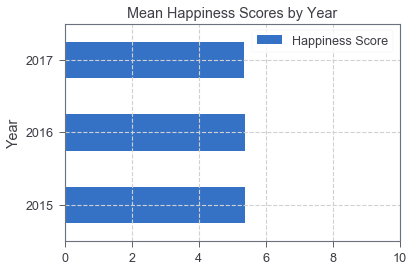

In [14]:
import matplotlib.pyplot as plt
import numpy as np
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
columns = ['Happiness Score', 'Year']
combined =pd.concat([happiness2015,happiness2016, happiness2017],axis=0)
pivot_table_combined = combined.pivot_table('Happiness Score',index='Year', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Year')
plt.show()